In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import *
from matplotlib import cm



In [4]:
# M_0 = (x_0, y_0, z_0)
# ИЛИ :
# M(1, 4, 2) n(6, 6, 6)
a = Plane( (1,4,2), normal_vector=(6,6,6))
print(a.equation())
# Уравнение прямой на плоскости
# Ax + By + C = 0
# Уравнение плоскости
# Ax + By + Cz + D = 0

6*x + 6*y + 6*z - 42


In [18]:
# (1,1,2)
# (2,4,7)
# (3,5,1)
# Нормаль через векторное произведение (M_0-N_1, M_0-N_2)
A = np.array([1,1,2])
B = np.array([3,5,1])
C = np.array([2,4,7])
AB = B - A
AC = C - A
VM = np.cross(AB, AC)
P = Plane( A, normal_vector = VM )
print(VM)
print(P.equation())

[ 23 -11   2]
23*x - 11*y + 2*z - 16


In [21]:
# Построение плоскости, параллелной данной, через точку
# ! у них одинаковые нормали
P = Plane( (1,4,6), normal_vector = (2,4,6))
M = Point(2,3,5)

P1 = Plane( M, normal_vector = (2,4,6))
P2 = P.parallel_plane(M)

print(P1.equation())
print(P2.equation())

2*x + 4*y + 6*z - 46
2*x + 4*y + 6*z - 46


In [32]:
# 1) (4,2,3) (2,0,1), x + 2y + 3z + 4 = 0
#    пл. перпедикулярная данной, проходящая через заданные две точки
# 2) x + y + z - 3 = 0  Найти расстояние от плосоксти до точки (1,2,3)

M1 = Point(4,2,3)
M2 = Point(2,0,1)
P1 = Plane( (-9,1,1), normal_vector=(1,2,3))
P2 = P1.perpendicular_plane(M1, M2)
print(P2.equation())
# ИЛИ
M1_M2_cross = np.cross( -np.array([4,2,3]) + np.array([2,0,1]), [1,2,3])
P2 = Plane(M1, normal_vector = M1_M2_cross)
print(P2.equation())

P = Plane( (1,1,1), normal_vector = (1,1,1))
M = Point(1,2,3)
print( P.distance(M) )

-2*x + 4*y - 2*z + 6
-2*x + 4*y - 2*z + 6
sqrt(3)


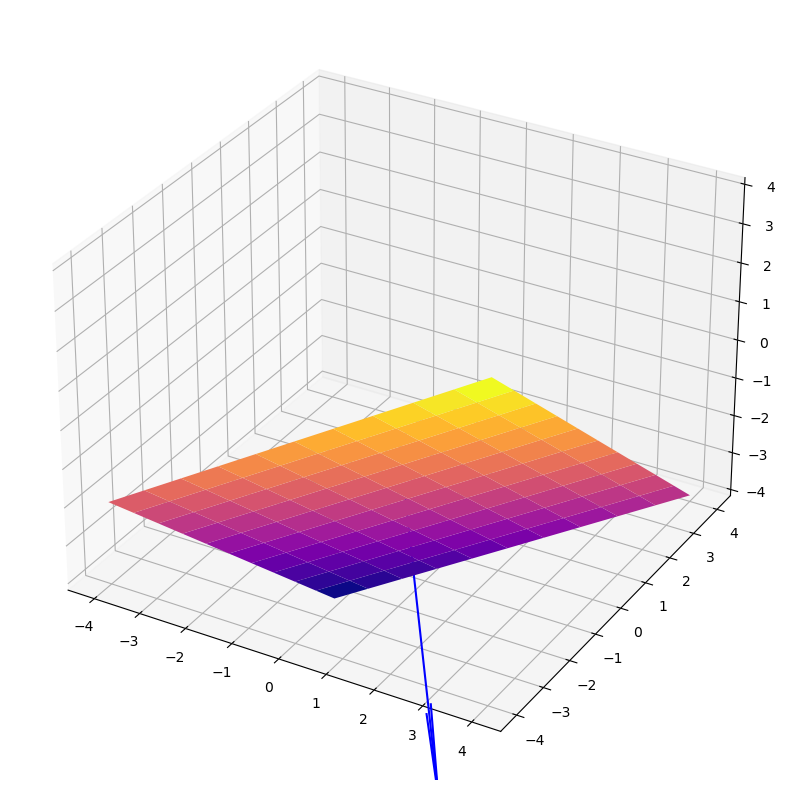

In [41]:
# Рисуем плоскость 3x - 4y - 4z - 12 = 0
A = 3
B = -4
C = -4
D = -12
f = lambda x,y: (-A*x - B*y - D) / C
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_zlim([-4,4])
xval = np.linspace(-4,4,100)
yval = np.linspace(-4,4,100)
# Получим сетку для получения плоскости
x, y = np.meshgrid(xval, yval)
p = np.array([0,0,-3])
v = np.array([3,-4,-4])
ax.quiver(*p, *v, color='Blue')
z = f(x,y)
surf = ax.plot_surface(x,y,z, rstride = 10, cstride = 10, cmap = cm.plasma) #surf - переменная плоскости
plt.show()

5*x + 3*y - 9*z
Плоскость, параллельная векторам a,b, проходящая через точку (2,3,-4):  5*x + 3*y - 9*z - 55
Расстояние от плоскости до точки:  94*sqrt(115)/115


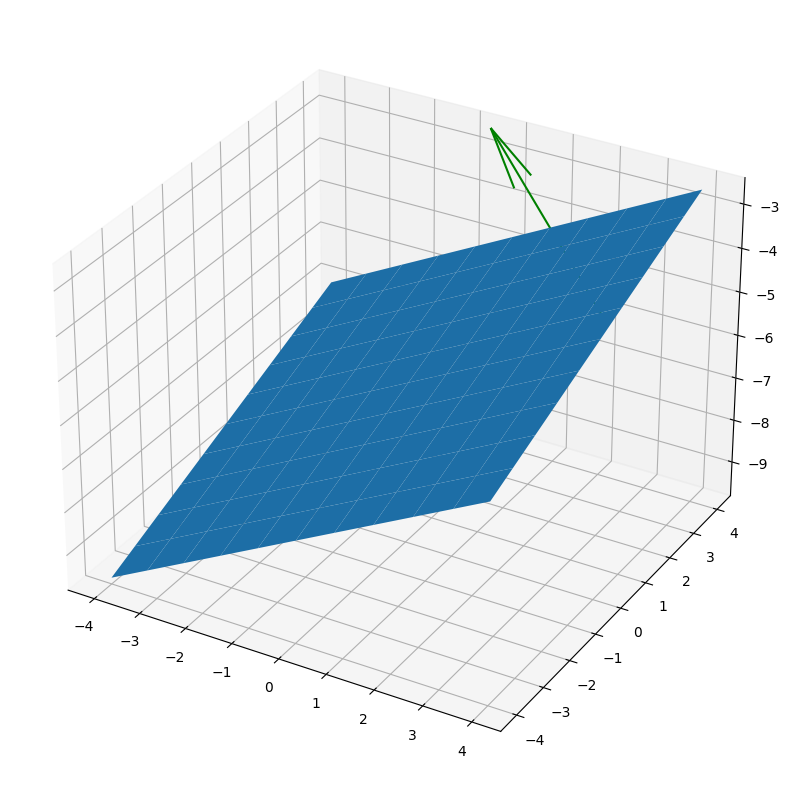

In [17]:
# M(2, 3, -4)
# a{-3, 2, -1}
# b{0,  3,  1}
# Найти и нарисовать плоскость, параллельную векторам a,b, проходящую через точку М
# Найти и возможно нарисовать расстояние от плоскости до точки (-3,1,3)
M = np.array([2,3,-4])
O = np.array([0,0,0])
v1 = np.array([-3,2,-1])
v2 = np.array([ 0,3, 1])
p1 = Point(-3,1, 3)
P1 = Plane(Point(0,0,0), Point(-3,2,-1), Point(0,3,1))
print(P1.equation())
P2 = P1.parallel_plane(Point(2,3,-4))
print("Плоскость, параллельная векторам a,b, проходящая через точку (2,3,-4): ", P2.equation())
Ro = P2.perpendicular_line(Point(-3,1,3))
#print(Ro)
p2 = Ro.points[1]
st = Ro.points[0]
#print(p1, p2)
d = p1.distance(P2)
print("Расстояние от плоскости до точки: ", d)

f = lambda x,y: (5*x + 3*y - 55) / 9

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

xval = np.linspace(-4,4,100)
yval = np.linspace(-4,4,100)

x, y = np.meshgrid(xval, yval)

#ax.quiver(*O, *v1, color='Blue')
#ax.quiver(*O, *v2, color='Red')
ax.quiver(*p2, *p1, color='Green')
z = f(x,y)
surf = ax.plot_surface(x,y,z, rstride = 10, cstride = 10) #surf - переменная плоскости
plt.show()
